## Продолжительность фильмов Netflix

**На курсе по Python on DataCamp у меня было задание - проанализировать продолжительность фильмов от Netflix.**

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
# Читаем CSV 
netflix_df = pd.read_csv("datasets/netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


1. Глядя на первые пять строк нашего нового фрейма данных, мы замечаем тип столбца.
2. Просматривая данные, становится ясно, что в наборе есть телешоу.
3. Более того, столбец продолжительности, который мы планировали использовать, по-видимому, представляет разные значения в зависимости от того, является ли строка фильмом или шоу. 
*Телешоу явно больше фильма по продолжительности.*

In [104]:
# Фильтруем данные с типом "Movie"
netflix_df_movies_only = netflix_df[netflix_df["type"] == "Movie"] 

# Отбираем нужные колонки
netflix_movies_col_subset = netflix_df_movies_only[["title","country","genre","release_year", "duration"]]

# Выводим
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


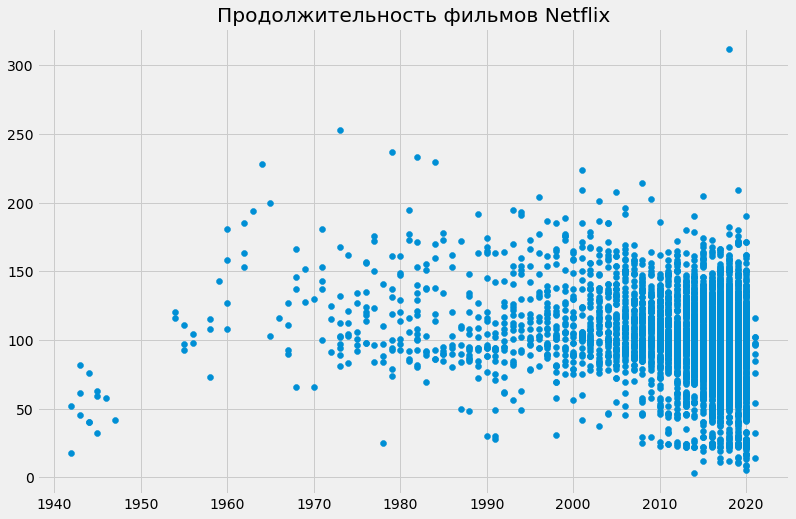

In [105]:
# Создаем точечную диаграмму 
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'])
plt.title('Продолжительность фильмов Netflix')
plt.show()

*Некоторые из этих фильмов длятся меньше часа!*

**Отфильтруем часть фильмов продолжительностью менее 60 минут и посмотрим на жанры.**

*Это могло бы дать нам некоторое представление о том, что приводит к снижению среднего показателя.*

In [106]:
# Отфильтруем фильмы меньше 60 минут
short_movies = netflix_movies_col_subset.query('duration < 60')

# Посмотрим на жанры 
short_movies.genre.unique()

array(['Documentaries', 'Uncategorized', 'Children', 'Stand-Up',
       'Comedies', 'Dramas', 'International Movies', 'Action', 'Music',
       'Classic Movies', 'Anime Features', 'Horror Movies'], dtype=object)

**Для наглядности дадим для части жанров цвета**

In [107]:
# Создадим пустой список и сделаем итерацию по строкам
colors = []
for lab, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == "Children":
        colors.append("red")
    elif row['genre'] == "Documentaries":
        colors.append("blue")
    elif row['genre'] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")
# Выведем  
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

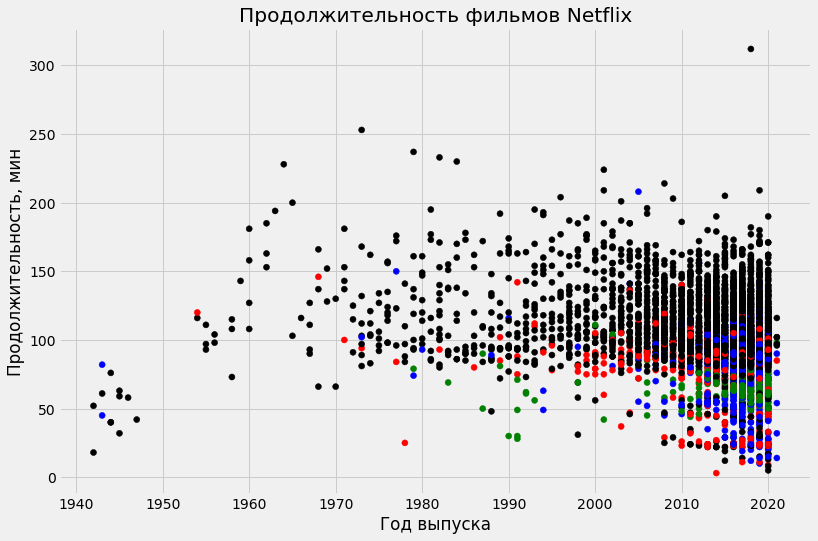

In [108]:
# Создадим точечную диаграмму с цветовым споровождением
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies_col_subset["release_year"],netflix_movies_col_subset["duration"],c=colors)
plt.title('Продолжительность фильмов Netflix')
plt.xlabel('Год выпуска')
plt.ylabel('Продолжительность, мин')
plt.show()

In [109]:
# Посмотрим, что за фильм идет больше 5 часов 
netflix_movies_col_subset.query('duration>300')

,title,country,genre,release_year,duration
957,Black Mirror: Bandersnatch,United States,Dramas,2018,312


In [110]:
# Удалим его для нахождения средней продолжительности более точно
netflix_movies_col_subset = netflix_movies_col_subset[netflix_movies_col_subset['title'] != "Black Mirror: Bandersnatch"]
netflix_movies_col_subset['duration'].mean()

99.26841517857143

### Средняя продолжительность фильмов Netflix за всё время 99 минут
**Растет или нет эта продолжительность, мы понять не сможем, пока не проанализируем по временным промежуткам. Допустим по 10 лет.**

In [111]:
# Посмотрим самый ранний год выпуска
minim = netflix_movies_col_subset['release_year'].min()
minim

1942

In [112]:
# # Посмотрим самый поздний год выпуска
maxim = netflix_movies_col_subset['release_year'].max()
maxim

2021

In [113]:
# Отсортируем фильмы по десятилетиям
netflix_movies_before_1950 = netflix_movies_col_subset.query('release_year < 1950')
netflix_movies_1950_1960 = netflix_movies_col_subset.query('release_year >= 1950' and 'release_year < 1960')
netflix_movies_1960_1970 = netflix_movies_col_subset.query('release_year >= 1960' and 'release_year < 1970')
netflix_movies_1970_1980 = netflix_movies_col_subset.query('release_year >= 1970' and 'release_year < 1980')
netflix_movies_1980_1990 = netflix_movies_col_subset.query('release_year >= 1980' and 'release_year < 1990')
netflix_movies_1990_2000 = netflix_movies_col_subset.query('release_year >= 1990' and 'release_year < 2000')
netflix_movies_2000_2010 = netflix_movies_col_subset.query('release_year >= 2000' and 'release_year < 2010')
netflix_movies_2010_2020 = netflix_movies_col_subset.query('release_year >= 2010' and 'release_year < 2020')

In [114]:
# Посчитаем среднее для каждого десятилетия
mean1 = netflix_movies_before_1950['duration'].mean()
mean2 =netflix_movies_1950_1960['duration'].mean()
mean3 =netflix_movies_1960_1970['duration'].mean()
mean4 =netflix_movies_1970_1980['duration'].mean()
mean5 =netflix_movies_1980_1990['duration'].mean()
mean6 =netflix_movies_1990_2000['duration'].mean()
mean7 =netflix_movies_2000_2010['duration'].mean()
mean8 =netflix_movies_2010_2020['duration'].mean()

In [115]:
# Создадим датафрейм 
means = [mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8]
years = ['1940+','1950+', '1960+','1970+','1980+','1990+','2000+','2010+']
means_dict = {'means':means,'years': years}
means_df = pd.DataFrame(means_dict)
means_df

,means,years
0,51.384615,1940+
1,76.916667,1950+
2,108.217391,1960+
3,114.513761,1970+
4,115.427885,1980+
5,114.699005,1990+
6,113.463609,2000+
7,100.100747,2010+


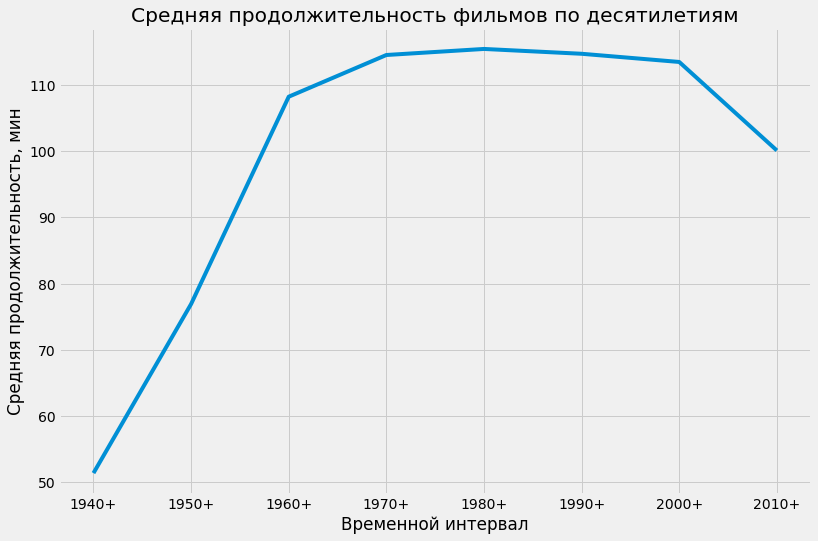

In [116]:
# Увидим как менялась продолжительность фильмов сквозь десятилетия
plt.figure(figsize=(12,8))
plt.plot(means_df['years'],means_df['means'])
plt.title('Средняя продолжительность фильмов по десятилетиям')
plt.xlabel('Временной интервал')
plt.ylabel('Средняя продолжительность, мин')
plt.show()

## Заключение
**Для себя можно сделать вывод, что большинство современных фильмов Netflix выходит за рамки полутора часов просмотра**